# 1.Download and import packages

In [1]:
!pip install geopandas geodatasets -q

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
%matplotlib inline

# 2.Import the data

In [3]:
!mkdir -p "Project_data"
data_dir = "Project_data/Metadata"

In [4]:
%%bash -s $data_dir
mkdir -p "$1"

wget -nc --progress=dot:giga -P "$1" https://polybox.ethz.ch/index.php/s/CA76kKFC9FApqpR/download/fungut_metadata.tsv

chmod -R +rxw "$1"

File ‘Project_data/Metadata/fungut_metadata.tsv’ already there; not retrieving.



# 3.Analysis and modifications in the metadata

In this section, we explored our sample metadata to better understand the dataset and address some of the questions from the FunGut guidelines. We also made a few modifications to the metadata, such as renaming certain columns and converting continuous variables into categorical bins.

In [5]:
os.getcwd() #Get the working directory

'/home/jovyan/assignments/FunGut-Project/Submission_FunGut_script'

In [6]:
sample_metadata = pd.read_csv(f"{data_dir}/fungut_metadata.tsv", sep="\t", na_values=["Not provided"])
sample_metadata.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample
0,ERR5327198,USA,TN,36.1,-86.8,female,67.0,152.0,41.0,17.75,Omnivore,I do not have this condition,No
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,I do not have this condition,I was diagnosed with gluten allergy (anti-glut...
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,I do not have this condition,I do not eat gluten because it makes me feel bad
3,ERR5327282,United Kingdom,NaN,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,I do not have this condition,No
4,ERR5327284,United Kingdom,NaN,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,I do not have this condition,No


In [7]:
sample_metadata.dtypes

ID                   object
country_sample       object
state_sample         object
latitude_sample     float64
longitude_sample    float64
sex_sample           object
age_years_sample    float64
height_cm_sample    float64
weight_kg_sample    float64
bmi_sample          float64
diet_type_sample     object
ibd_sample           object
gluten_sample        object
dtype: object

## 3.1 Sex ratio

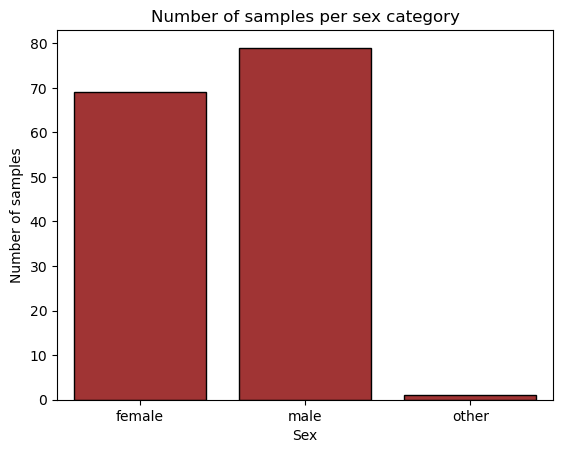

In [8]:
sns.countplot(data=sample_metadata, x='sex_sample', color="firebrick", edgecolor="black")
plt.xlabel('Sex')
plt.ylabel('Number of samples')
plt.title('Number of samples per sex category')
plt.show()

## 3.2 Distribution of age and binning into age categories

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


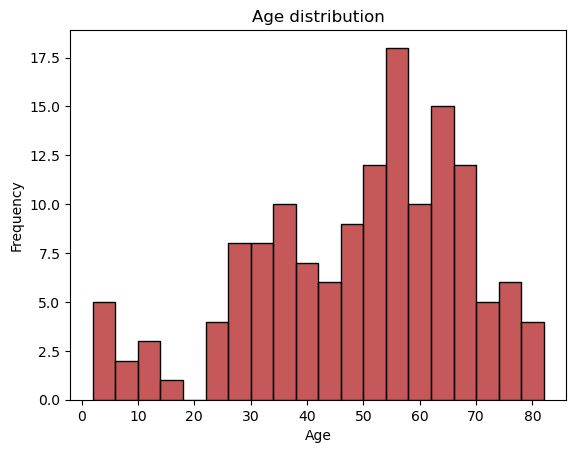

In [9]:
sns.histplot(data=sample_metadata, x="age_years_sample", bins=20, color="firebrick", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

In [10]:
print(sample_metadata["age_years_sample"].max())
print(sample_metadata["age_years_sample"].min())

82.0
2.0


In [11]:
#Creating age bins
bins_age = range(2, 92, 10)
list(bins_age)

[2, 12, 22, 32, 42, 52, 62, 72, 82]

In [12]:
#Creating labels for the bins
labels_bins_age = [f"{i}-{i+10}" for i in range(2, 82, 10)]
labels_bins_age

['2-12', '12-22', '22-32', '32-42', '42-52', '52-62', '62-72', '72-82']

In [13]:
#Distributing the ages of our sample metadata into the right bins in a new column
sample_metadata["age_range"] = pd.cut(
    sample_metadata["age_years_sample"],
    bins=bins_age,
    labels=labels_bins_age,
    right=True,
    include_lowest=True
)

In [14]:
#Checking that the column appeared
sample_metadata.head(n=1)

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample,age_range
0,ERR5327198,USA,TN,36.1,-86.8,female,67.0,152.0,41.0,17.75,Omnivore,I do not have this condition,No,62-72


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


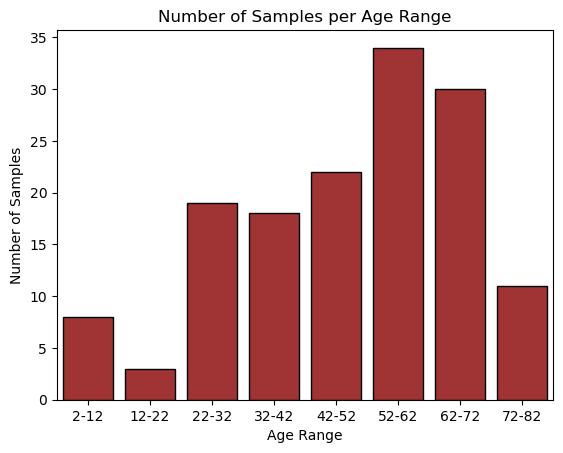

In [15]:
sns.countplot(data=sample_metadata, x='age_range', order=labels_bins_age, color="firebrick", edgecolor="black")
plt.xlabel('Age Range')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Age Range')
plt.show()

## 3.3 Distribution of height and weight, binning of bmi indexes

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


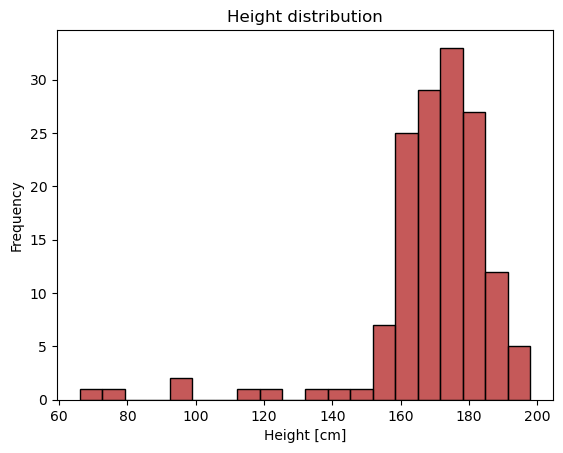

In [16]:
sns.histplot(data=sample_metadata, x="height_cm_sample", bins=20, color="firebrick", edgecolor="black")
plt.xlabel("Height [cm]")
plt.ylabel("Frequency")
plt.title("Height distribution")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


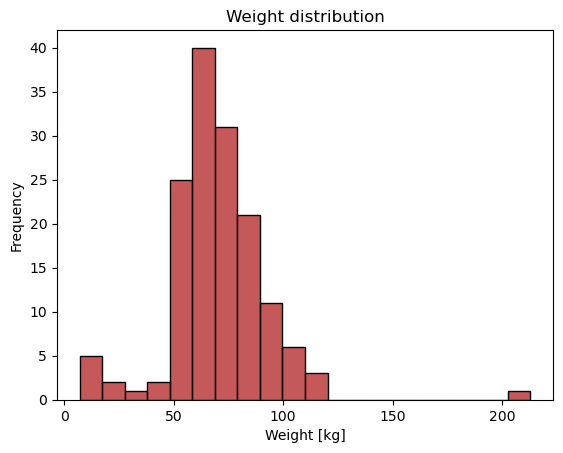

In [17]:
sns.histplot(data=sample_metadata, x="weight_kg_sample", bins=20, color="firebrick", edgecolor="black")
plt.xlabel("Weight [kg]")
plt.ylabel("Frequency")
plt.title("Weight distribution")
plt.show()

In [18]:
print(sample_metadata["bmi_sample"].max())
print(sample_metadata["bmi_sample"].min())

71.61
14.35


In [19]:
#Creating the function that will assign the BMI to a BMI category
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.99:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 40:
        return 'Obesity'
    elif bmi >= 40:
        return 'Severe Obesity'
    
# BMI categories were taken from:
# Centers for Disease Control and Prevention. (2024, March 19). Adult BMI Categories. CDC. 
#    https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [20]:
# Creation of a new column with the BMI category

sample_metadata['bmi_category'] = sample_metadata["bmi_sample"].apply(classify_bmi)

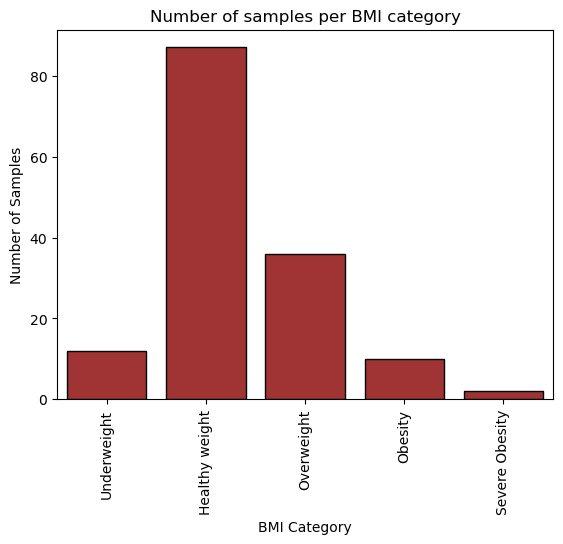

In [21]:
bmi_cat = sns.countplot(data=sample_metadata, x='bmi_category', color="firebrick", edgecolor="black")
bmi_cat.set_xticklabels(bmi_cat.get_xticklabels(), rotation=90)
plt.xlabel('BMI Category')
plt.ylabel('Number of Samples')
plt.title('Number of samples per BMI category')
plt.show()

## 3.4 Types of diet

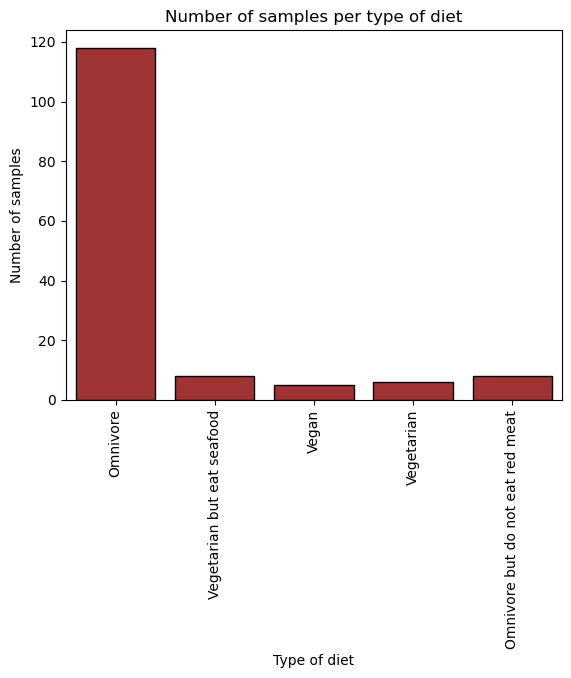

In [22]:
type_of_diet = sns.countplot(data=sample_metadata, x='diet_type_sample', color="firebrick", edgecolor="black")
type_of_diet.set_xticklabels(type_of_diet.get_xticklabels(), rotation=90)
plt.xlabel('Type of diet')
plt.ylabel('Number of samples')
plt.title('Number of samples per type of diet')
plt.show()

## 3.5 Diseases - Inflammatory bowel disease (IBD) and celiac disease (CD)

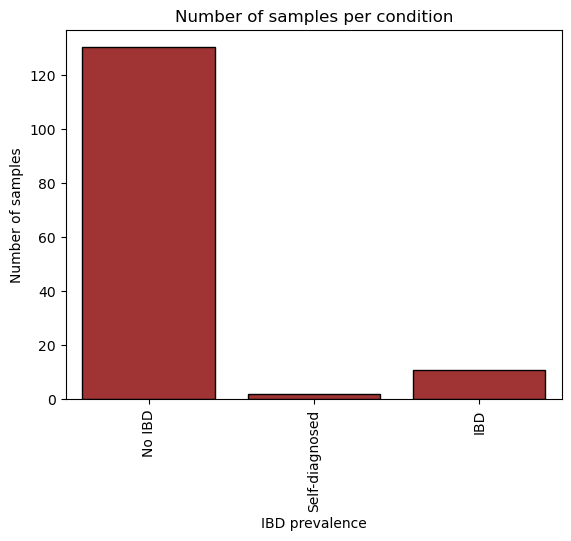

In [23]:
sample_metadata.replace({"ibd_sample":"I do not have this condition"}, "No IBD", inplace=True)
sample_metadata.replace({"ibd_sample":"Diagnosed by a medical professional (doctor, physician assistant)"}, "IBD", inplace=True)

IBD = sns.countplot(data=sample_metadata, x="ibd_sample", color="firebrick", edgecolor="black")
IBD.set_xticklabels(IBD.get_xticklabels(), rotation=90)
plt.xlabel('IBD prevalence')
plt.ylabel('Number of samples')
plt.title('Number of samples per condition')
plt.show()

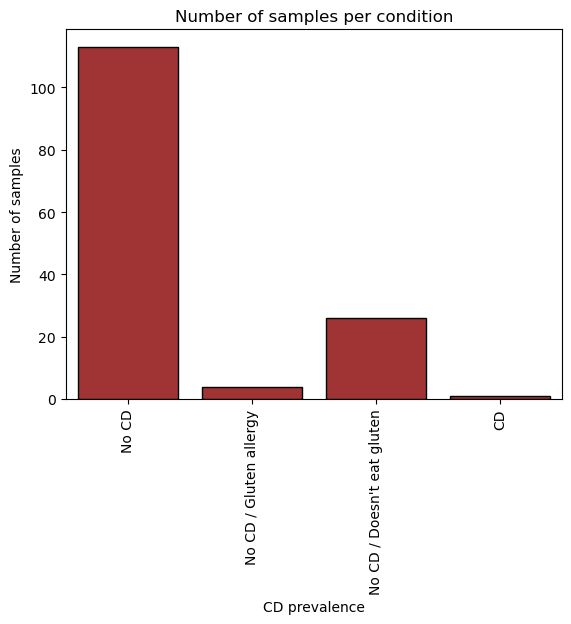

In [24]:
sample_metadata.replace({"gluten_sample":"No"}, "No CD", inplace=True)
sample_metadata.replace({"gluten_sample":"I do not eat gluten because it makes me feel bad"}, "No CD / Doesn't eat gluten", inplace=True)
sample_metadata.replace({"gluten_sample":"I was diagnosed with gluten allergy (anti-gluten IgG), but not celiac disease"}, "No CD / Gluten allergy", inplace=True)
sample_metadata.replace({"gluten_sample":"I was diagnosed with celiac disease"}, "CD", inplace=True)

CD = sns.countplot(data=sample_metadata, x="gluten_sample", color="firebrick", edgecolor="black")
CD.set_xticklabels(CD.get_xticklabels(), rotation=90)
plt.xlabel('CD prevalence')
plt.ylabel('Number of samples')
plt.title('Number of samples per condition')
plt.show()

## 3.6 Geographic origin, binning of continent

In [25]:
sample_metadata["country_sample"].value_counts()

country_sample
United Kingdom    54
USA               44
Australia         44
New Zealand        3
Germany            2
Sweden             1
Isle of Man        1
Name: count, dtype: int64

In [26]:
#Creating the function that will assign the country to a continent
def classify_continent(country):
    if country == "United Kingdom":
        return 'Europe'
    elif country == "USA":
        return 'North America'
    elif country == "Australia":
        return 'Oceania'
    elif country == "New Zealand":
        return 'Oceania'
    elif country == "Germany":
        return 'Europe'
    elif country == "Sweden":
        return 'Europe'
    elif country == "Isle of Man":
        return "Europe"

In [27]:
sample_metadata["continent"] = sample_metadata["country_sample"].apply(classify_continent)

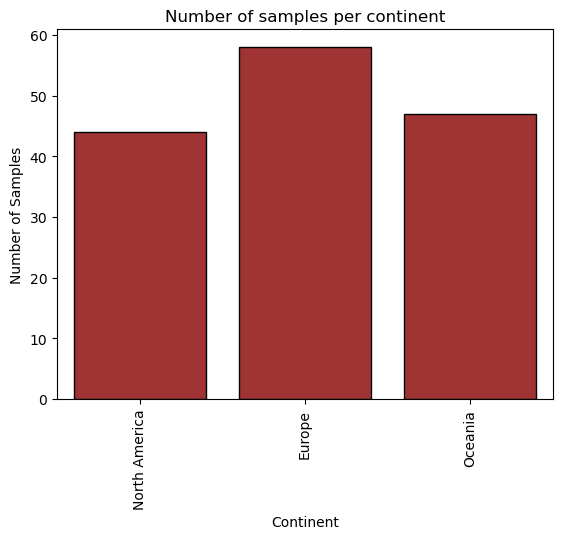

In [28]:
continents = sns.countplot(data=sample_metadata, x='continent', color="firebrick", edgecolor="black")
continents.set_xticklabels(continents.get_xticklabels(), rotation=90)
plt.xlabel('Continent')
plt.ylabel('Number of Samples')
plt.title('Number of samples per continent')
plt.show()

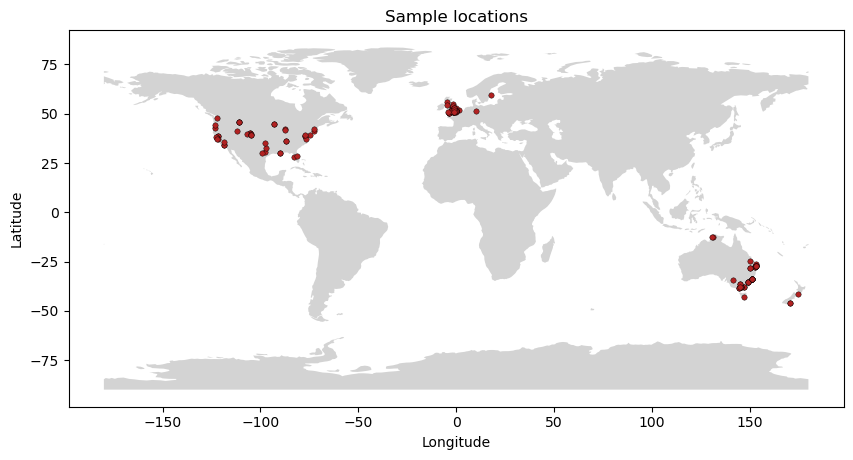

In [29]:
# Convert to GeoDataFrame 
coordinates = gpd.GeoDataFrame(sample_metadata, geometry=gpd.points_from_xy(sample_metadata.longitude_sample, sample_metadata.latitude_sample), crs="EPSG:4326") 
world_map = gpd.read_file(geodatasets.get_path("naturalearth.land")) # Loads the map of the world 

fig, ax = plt.subplots(figsize=(10, 6)) 

world_map.plot(ax=ax, color='lightgrey') 
coordinates.plot(ax=ax, color='firebrick', markersize=15, edgecolor='black', linewidth=0.3) 

plt.title("Sample locations") 
plt.xlabel("Longitude") 
plt.ylabel("Latitude") 
plt.show()

In [30]:
sample_metadata.head()

,ID,country_sample,state_sample,latitude_sample,longitude_sample,sex_sample,age_years_sample,height_cm_sample,weight_kg_sample,bmi_sample,diet_type_sample,ibd_sample,gluten_sample,age_range,bmi_category,continent
0,ERR5327198,USA,TN,36.1,-86.8,female,67.0,152.0,41.0,17.75,Omnivore,No IBD,No CD,62-72,Underweight,North America
1,ERR5327199,USA,DC,38.9,-77.1,male,55.0,182.0,79.0,23.73,Omnivore,No IBD,No CD / Gluten allergy,52-62,Healthy weight,North America
2,ERR5327266,USA,VA,38.9,-77.1,female,28.0,175.0,61.0,19.94,Omnivore,No IBD,No CD / Doesn't eat gluten,22-32,Healthy weight,North America
3,ERR5327282,United Kingdom,NaN,51.6,-0.2,female,26.0,166.0,60.0,21.77,Omnivore,No IBD,No CD,22-32,Healthy weight,Europe
4,ERR5327284,United Kingdom,NaN,51.5,-0.2,female,25.0,173.0,59.0,20.01,Vegetarian but eat seafood,No IBD,No CD,22-32,Healthy weight,Europe


In [31]:
sample_metadata.to_csv(f"{data_dir}/updated_fungut_metadata.tsv", sep='\t', index=False)